In [3]:
from dustpy import Simulation
from dustpy import plot
import seaborn as sns
from dustpy import plot
import dustpy.constants as c
import matplotlib.pyplot as plt
import numpy as np
import sys
import astropy.units as u
sys.path.append('Dustpy_additions')
from dustpy_plottool import *

sns.set_theme()
sns.set(font_scale=1.3)

In [4]:
sim = Simulation()
sim.initialize()

In [5]:
sim.dust

Group (Dust quantities)
-----------------------
    backreaction : Group (Backreaction coefficients)
    boundary     : Group (Boundary conditions)
    coagulation  : Group (Coagulation quantities)
    delta        : Group (Mixing parameters)
    Fi           : Group (Fluxes)
    p            : Group (Probabilities)
    S            : Group (Sources)
    v            : Group (Velocities)
  -----
    a            : Field (Particle size [cm])
    D            : Field (Diffusivity [cm²/s])
    eps          : Field (Dust-to-gas ratio)
    fill         : Field (Filling factor)
    H            : Field (Scale heights [cm])
    kernel       : Field (Collision kernel [cm²/s])
    rho          : Field (Midplane mass density per mass bin [g/cm³])
    rhos         : Field (Solid state density [g/cm³])
    Sigma        : Field (Surface density per mass bin [g/cm²])
    SigmaFloor   : Field (Floor value of surface density [g/cm²])
    St           : Field (Stokes number)
  -----

In [6]:
sim.dust.SigmaFloor

[[9.60034922e-40 1.33396420e-39 1.85353724e-39 ... 4.97247657e-23
  6.90923379e-23 9.60034922e-23]
 [8.36155462e-40 1.16183425e-39 1.61436345e-39 ... 4.33084605e-23
  6.01769107e-23 8.36155462e-23]
 [7.28260963e-40 1.01191533e-39 1.40605179e-39 ... 3.77200922e-23
  5.24118982e-23 7.28260963e-23]
 ...
 [1.45307166e-45 2.01903652e-45 2.80544215e-45 ... 7.52614785e-29
  1.04575485e-28 1.45307166e-28]
 [1.26557251e-45 1.75850729e-45 2.44343796e-45 ... 6.55500075e-29
  9.10814400e-29 1.26557251e-28]
 [1.10226757e-45 1.53159583e-45 2.12814550e-45 ... 5.70916698e-29
  7.93286180e-29 1.10226757e-28]]

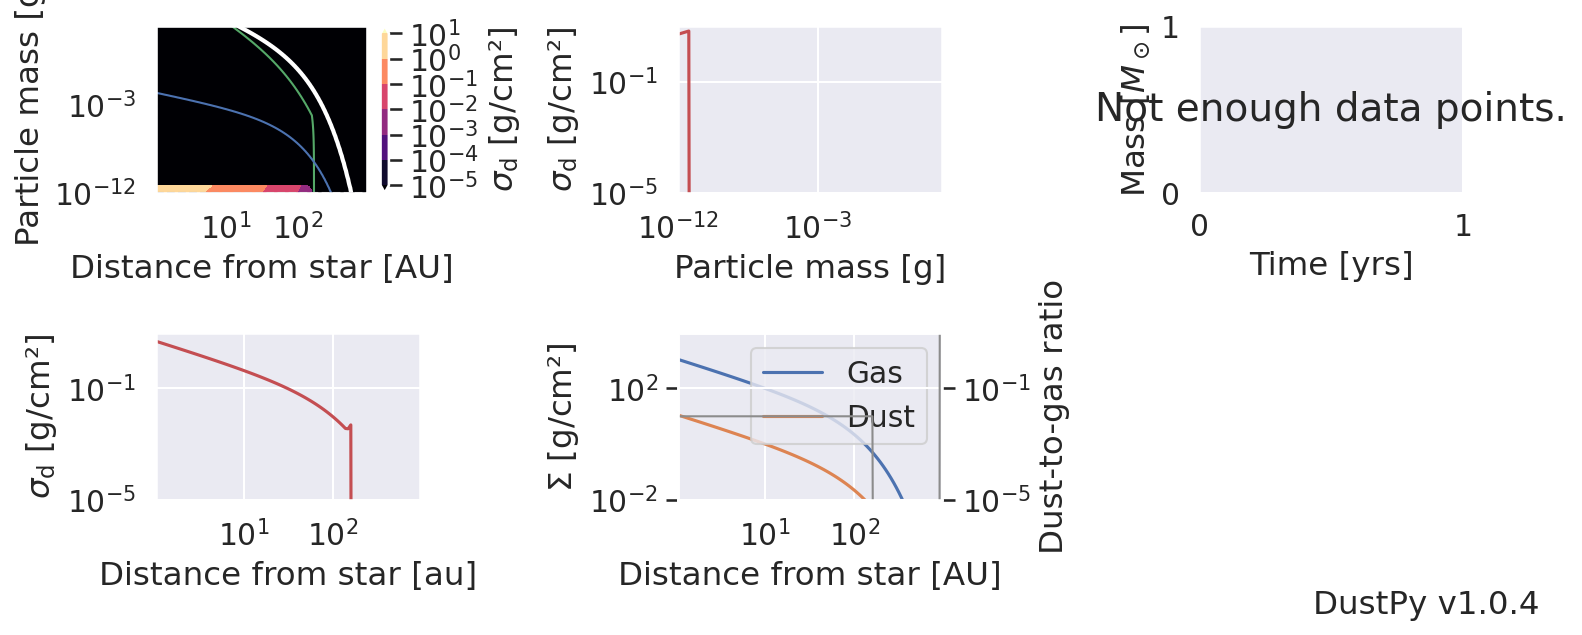

In [7]:
plot.panel(sim)

In [8]:
# Dust mass grid has 120 bins where the initial dust 
sim.grid.m.shape

(120,)

In [9]:
sim.dust.Sigma.shape

(100, 120)

In [10]:
sim.grid.ri /c.au

[   1.            1.07151931    1.14815362    1.23026877    1.31825674
    1.41253754    1.51356125    1.6218101     1.73780083    1.86208714
    1.99526231    2.13796209    2.29086765    2.45470892    2.63026799
    2.81838293    3.01995172    3.23593657    3.4673685     3.71535229
    3.98107171    4.26579519    4.5708819     4.89778819    5.2480746
    5.62341325    6.02559586    6.45654229    6.91830971    7.41310241
    7.94328235    8.51138038    9.12010839    9.77237221   10.47128548
   11.22018454   12.02264435   12.88249552   13.80384265   14.79108388
   15.84893192   16.98243652   18.19700859   19.498446     20.89296131
   22.38721139   23.98832919   25.70395783   27.54228703   29.51209227
   31.6227766    33.88441561   36.30780548   38.9045145    41.68693835
   44.66835922   47.86300923   51.2861384    54.95408739   58.88436554
   63.09573445   67.60829754   72.44359601   77.62471166   83.17637711
   89.12509381   95.4992586   102.32929923  109.64781961  117.48975549
  125.8

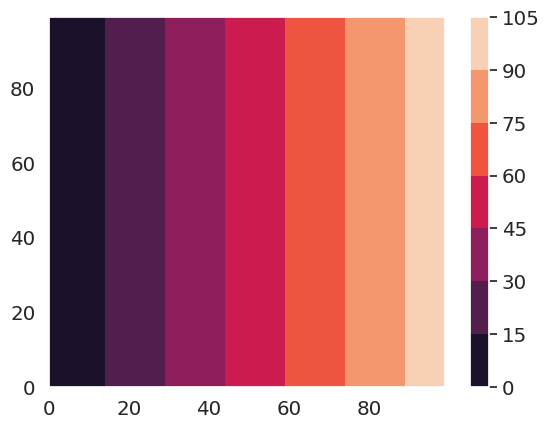

In [11]:
test = np.vstack([np.arange(1,101) for _ in range(100)])

cbar = plt.contourf(test)
plt.colorbar(cbar)

In [12]:
sim.dust

Group (Dust quantities)
-----------------------
    backreaction : Group (Backreaction coefficients)
    boundary     : Group (Boundary conditions)
    coagulation  : Group (Coagulation quantities)
    delta        : Group (Mixing parameters)
    Fi           : Group (Fluxes)
    p            : Group (Probabilities)
    S            : Group (Sources)
    v            : Group (Velocities)
  -----
    a            : Field (Particle size [cm])
    D            : Field (Diffusivity [cm²/s])
    eps          : Field (Dust-to-gas ratio)
    fill         : Field (Filling factor)
    H            : Field (Scale heights [cm])
    kernel       : Field (Collision kernel [cm²/s])
    rho          : Field (Midplane mass density per mass bin [g/cm³])
    rhos         : Field (Solid state density [g/cm³])
    Sigma        : Field (Surface density per mass bin [g/cm²])
    SigmaFloor   : Field (Floor value of surface density [g/cm²])
    St           : Field (Stokes number)
  -----

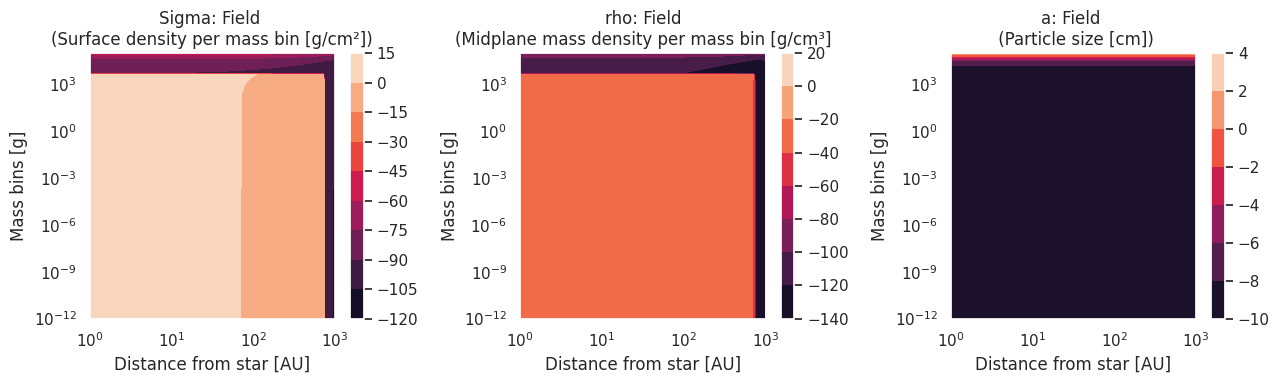

In [13]:
sns.set_theme()
fig = plt.figure(figsize = (13,4))
axs00 = fig.add_subplot(131)

extent = [1, 1000, sim.grid.m[0], sim.grid.m[-1], ]
clb = plt.contourf(np.log(sim.dust.Sigma).T, extent = extent)
axs00.set_xscale('log')
axs00.set_yscale('log')
axs00.set(xlabel = 'Distance from star [AU]', title = 'Sigma: Field \n(Surface density per mass bin [g/cm²])', ylabel = 'Mass bins [g]')
fig.colorbar(clb)
plt.grid()

axs01 = fig.add_subplot(132)
extent =[ 1, 1000, sim.grid.m[0], sim.grid.m[-1], ]
clb = plt.contourf(np.log(sim.dust.rho).T, extent = extent)
axs01.set_xscale('log')
axs01.set_yscale('log')
axs01.set(xlabel = 'Distance from star [AU]', ylabel = 'Mass bins [g]', title = 'rho: Field\n(Midplane mass density per mass bin [g/cm³]')
fig.colorbar(clb, ax = axs01)

axs02 = fig.add_subplot(133)
extent =[ 1, 1000, sim.grid.m[0], sim.grid.m[-1], ]
clb = plt.contourf(np.log(sim.dust.a.T), extent = extent)
axs02.set_xscale('log')
axs02.set_yscale('log')
axs02.set(xlabel = 'Distance from star [AU]', ylabel = 'Mass bins [g]', title =   'a: Field \n (Particle size [cm])')
fig.colorbar(clb, ax = axs02)
plt.tight_layout()

In [14]:
sim.dust.fill * sim.dust.rhos

[[1.67 1.67 1.67 ... 1.67 1.67 1.67]
 [1.67 1.67 1.67 ... 1.67 1.67 1.67]
 [1.67 1.67 1.67 ... 1.67 1.67 1.67]
 ...
 [1.67 1.67 1.67 ... 1.67 1.67 1.67]
 [1.67 1.67 1.67 ... 1.67 1.67 1.67]
 [1.67 1.67 1.67 ... 1.67 1.67 1.67]]

In [15]:
sim.dust.rhos

[[1.67 1.67 1.67 ... 1.67 1.67 1.67]
 [1.67 1.67 1.67 ... 1.67 1.67 1.67]
 [1.67 1.67 1.67 ... 1.67 1.67 1.67]
 ...
 [1.67 1.67 1.67 ... 1.67 1.67 1.67]
 [1.67 1.67 1.67 ... 1.67 1.67 1.67]
 [1.67 1.67 1.67 ... 1.67 1.67 1.67]]

In [16]:
sim.dust

Group (Dust quantities)
-----------------------
    backreaction : Group (Backreaction coefficients)
    boundary     : Group (Boundary conditions)
    coagulation  : Group (Coagulation quantities)
    delta        : Group (Mixing parameters)
    Fi           : Group (Fluxes)
    p            : Group (Probabilities)
    S            : Group (Sources)
    v            : Group (Velocities)
  -----
    a            : Field (Particle size [cm])
    D            : Field (Diffusivity [cm²/s])
    eps          : Field (Dust-to-gas ratio)
    fill         : Field (Filling factor)
    H            : Field (Scale heights [cm])
    kernel       : Field (Collision kernel [cm²/s])
    rho          : Field (Midplane mass density per mass bin [g/cm³])
    rhos         : Field (Solid state density [g/cm³])
    Sigma        : Field (Surface density per mass bin [g/cm²])
    SigmaFloor   : Field (Floor value of surface density [g/cm²])
    St           : Field (Stokes number)
  -----

In [17]:
sim.dust.updateorder

['delta',
 'rhos',
 'fill',
 'a',
 'St',
 'H',
 'rho',
 'backreaction',
 'v',
 'D',
 'eps',
 'kernel',
 'p',
 'S']

In [18]:
np.sum(sim.dust.Sigma)

157.57532303532517

In [19]:
(0.01 * u.mm).to('cm')

<Quantity 0.001 cm>

In [20]:
### This does not change anything for the inital nor final plot### Sigma must be changed in order to have an effect on the result
''''size_index = np.argmin(abs(sim.dust.a - 0.001), axis =1)[0]
sim.dust.a[:, :size_index] = 0 
sim.dust.a[:, size_index + 1:] = 0 
sim.dust.a[:,28]'''

"'size_index = np.argmin(abs(sim.dust.a - 0.001), axis =1)[0]\nsim.dust.a[:, :size_index] = 0 \nsim.dust.a[:, size_index + 1:] = 0 \nsim.dust.a[:,28]"

In [21]:
m = (4/3 * (1 * u.mm)**3 * np.pi * sim.dust.rhos[0,0] * (u.g / u.cm**3))
m.to('g')
m = (m.to('g')).value
m

0.006995279641993274

$$m=\frac{4}{3}a^3\pi\rho_s=6\cdot10^{-9}\;g$$

69


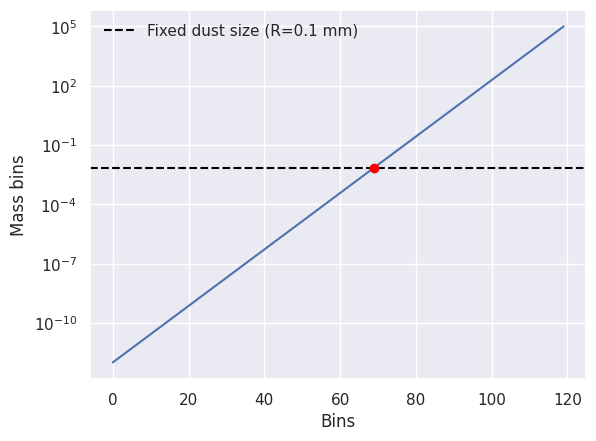

In [22]:
plt.semilogy(sim.grid.m)
plt.axhline(m, ls = '--', label = 'Fixed dust size (R=0.1 mm)', c = 'black')
plt.legend(frameon = False)
mass_bins_index = np.argmin(abs(sim.grid.m - m))
plt.plot(mass_bins_index, sim.grid.m[mass_bins_index], 'o', c = 'red')
plt.ylabel('Mass bins')
plt.xlabel('Bins')
print(mass_bins_index)

# The simulation set up starts here!!

In [23]:
### Setting up the initial conditions ###
sim = Simulation()
sim.ini.grid.mmin = 1e-3
sim.ini.grid.mmax = 2e-3
sim.ini.grid.Nmbpd = 1
sim.ini.dust.allowDriftingParticles = True
sim.ini.dust.aIniMax = 0.1
#sim.ini.dust
sim.initialize()

In [24]:
sim.grid.m
sim.dust.a

[[0.05228755 0.06587819]
 [0.05228755 0.06587819]
 [0.05228755 0.06587819]
 [0.05228755 0.06587819]
 [0.05228755 0.06587819]
 [0.05228755 0.06587819]
 [0.05228755 0.06587819]
 [0.05228755 0.06587819]
 [0.05228755 0.06587819]
 [0.05228755 0.06587819]
 [0.05228755 0.06587819]
 [0.05228755 0.06587819]
 [0.05228755 0.06587819]
 [0.05228755 0.06587819]
 [0.05228755 0.06587819]
 [0.05228755 0.06587819]
 [0.05228755 0.06587819]
 [0.05228755 0.06587819]
 [0.05228755 0.06587819]
 [0.05228755 0.06587819]
 [0.05228755 0.06587819]
 [0.05228755 0.06587819]
 [0.05228755 0.06587819]
 [0.05228755 0.06587819]
 [0.05228755 0.06587819]
 [0.05228755 0.06587819]
 [0.05228755 0.06587819]
 [0.05228755 0.06587819]
 [0.05228755 0.06587819]
 [0.05228755 0.06587819]
 [0.05228755 0.06587819]
 [0.05228755 0.06587819]
 [0.05228755 0.06587819]
 [0.05228755 0.06587819]
 [0.05228755 0.06587819]
 [0.05228755 0.06587819]
 [0.05228755 0.06587819]
 [0.05228755 0.06587819]
 [0.05228755 0.06587819]
 [0.05228755 0.06587819]


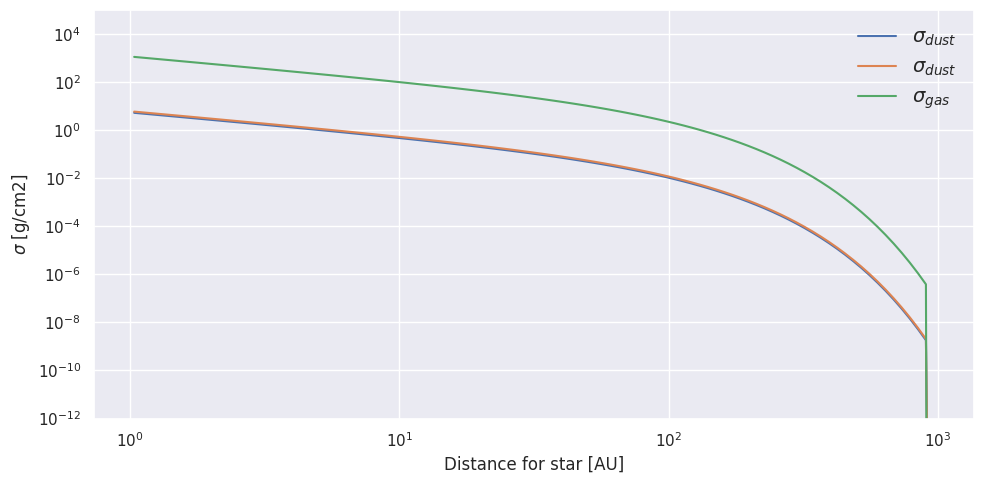

In [25]:
fig, axs = plt.subplots(figsize = (10, 5))
axs.set(ylabel = '$\sigma$ [g/cm2]', xlabel = 'Distance for star [AU]', ylim = (1e-12, 1e5))
plt.loglog(sim.grid.r / c.au, sim.dust.Sigma, label = '$\sigma_{dust}$')
plt.loglog(sim.grid.r / c.au, sim.gas.Sigma, label = '$\sigma_{gas}$')

plt.legend(frameon = False, prop = {'size':14})
plt.tight_layout()

sim_dust0 = sim.dust.Sigma.copy()
sim_gas0 = sim.gas.Sigma.copy()

In [26]:
#### Setting up the simulation updaters and runtime ###
sim.dust.p.frag = 0
sim.dust.p.stick = 0
### You can furthermore unset the updaters of the other fields, that are only used for coagulation to save computational resources.
sim.dust.p.updater = None
sim.dust.v.frag.updater = None
#sim.dust.kernel.updater = None

snapshots = np.logspace(4., 7, num=4, base=10.) * c.year
snapshots / c.year

sim.t.snapshots = snapshots

sim.writer.datadir = "simple_dust"
sim.writer.overwrite = True


In [27]:
#sim.run()

In [28]:
r = sim.writer.read.sequence("grid.r") / c.au
Sigma_gas = sim.writer.read.sequence("gas.Sigma")
Sigma_dust = sim.writer.read.sequence("dust.Sigma")
nu = sim.writer.read.sequence("gas.nu")
t = sim.writer.read.sequence("t") / c.year

RuntimeError: <datadir> does not exist or is empty.

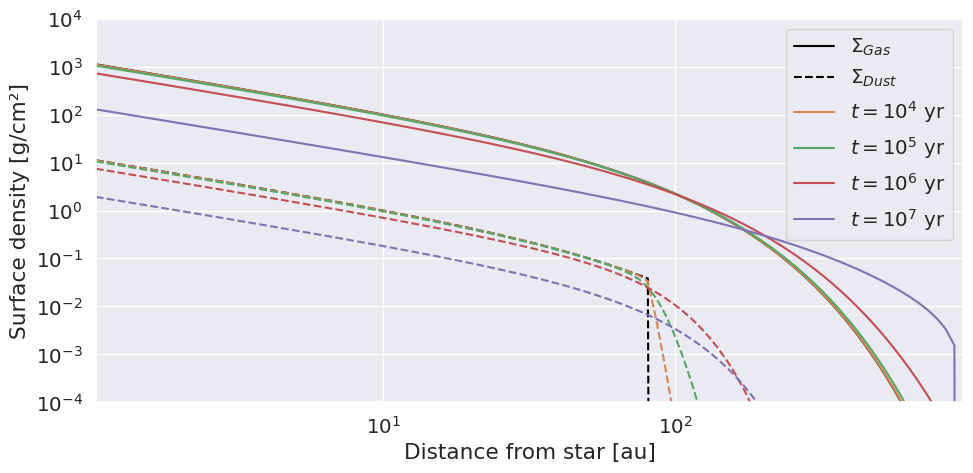

In [ ]:
sns.set(font_scale=1.3)
fig, ax = plt.subplots(figsize = (10, 5))

ax.loglog(r[0], Sigma_gas[0], c = 'black', label = '$\Sigma_{Gas}$')
ax.loglog(r[0], Sigma_dust[0,:,0] + Sigma_dust[0,:,1], c = 'black', label = '$\Sigma_{Dust}$', ls = '--')
for i in range(1, len(sim.t.snapshots)+1):
    cstr = "C"+str(i)
    ax.loglog(r[i], Sigma_gas[i], c=cstr, label=f'$t=10^{np.log10(t[i]):1.0f}$ yr')
    ax.loglog(r[i], Sigma_dust[i,:,0] + Sigma_dust[i,:,1], c=cstr, ls = '--')
ax.legend()
ax.set_xlim(r[0, 0], r[0, -1])
ax.set_ylim(1.e-4, 1.e4)
ax.set_xlabel("Distance from star [au]")
ax.set_ylabel("Surface density [g/cm²]")
fig.tight_layout()
#plt.savefig('../graphics/simple_dust', dpi = 300)

In [ ]:
sigmaDust2 = plot._readdata("simple_dust").sigmaDust
Stokes = sim.writer.read.sequence("dust.St")

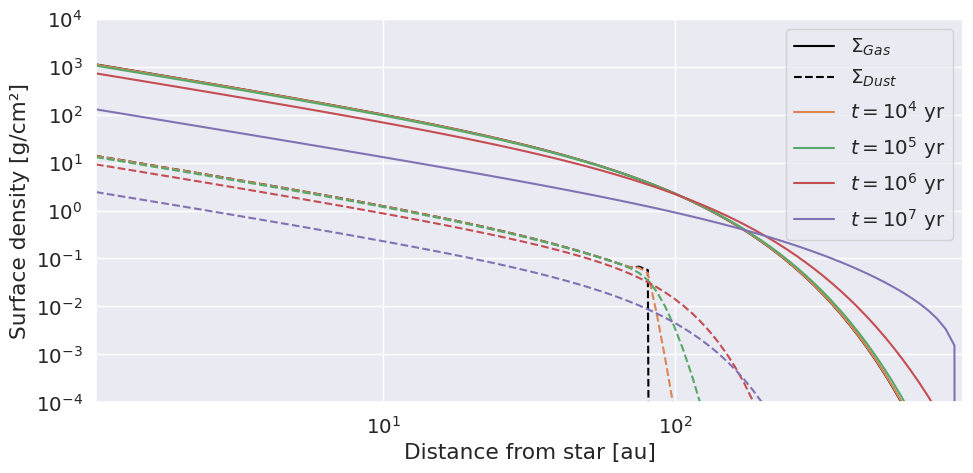

In [ ]:
sns.set(font_scale=1.3)
fig, ax = plt.subplots(figsize = (10, 5))

ax.loglog(r[0], Sigma_gas[0], c = 'black', label = '$\Sigma_{Gas}$')
ax.loglog(r[0], sigmaDust2[0,:,0] + Sigma_dust[0,:,1], c = 'black', label = '$\Sigma_{Dust}$', ls = '--')
for i in range(1, len(sim.t.snapshots)+1):
    cstr = "C"+str(i)
    ax.loglog(r[i], Sigma_gas[i], c=cstr, label=f'$t=10^{np.log10(t[i]):1.0f}$ yr')
    ax.loglog(r[i], sigmaDust2[i,:,0] + Sigma_dust[i,:,1], c=cstr, ls = '--')
ax.legend()
ax.set_xlim(r[0, 0], r[0, -1])
ax.set_ylim(1.e-4, 1.e4)
ax.set_xlabel("Distance from star [au]")
ax.set_ylabel("Surface density [g/cm²]")
fig.tight_layout()
plt.savefig('../graphics/simple_dust', dpi = 300)

## Making plots of:
- Stokes nr as a function of radius and time
- Dust to gas ratio as a function of radius and time

In [ ]:
mean_st = np.average(Stokes, axis = 2)

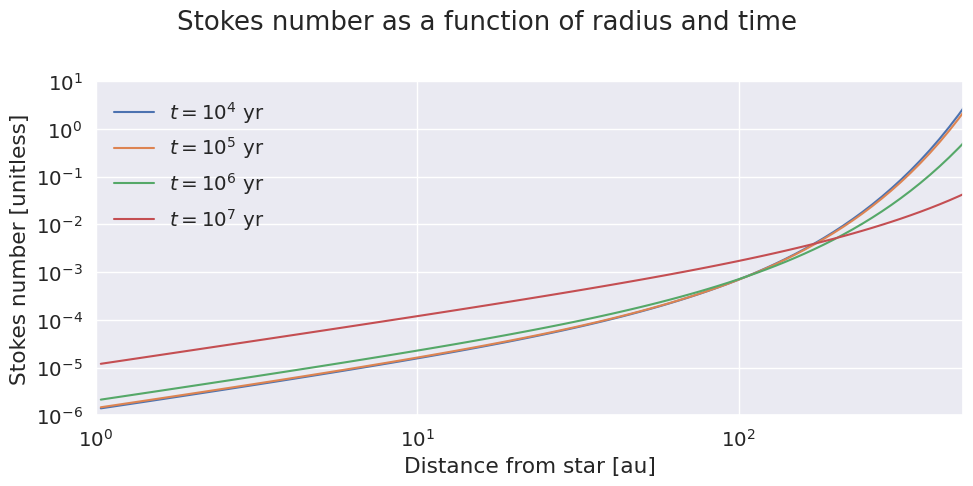

In [ ]:
fig, ax = plt.subplots(figsize = (10, 5))

fig.suptitle('Stokes number as a function of radius and time')
for i in range(1, len(sim.t.snapshots)+1):
    cstr = "C"+str(i)
    ax.loglog(r[i], mean_st[i], label=f'$t=10^{np.log10(t[i]):1.0f}$ yr')

ax.set(xlim = (1, 500), ylim = (1e-6, 10), xlabel = 'Distance from star [au]', ylabel = 'Stokes number [unitless]')
plt.legend(frameon = False, ncol = 1)
plt.tight_layout()
plt.savefig('../graphics/stnr', dpi = 300)

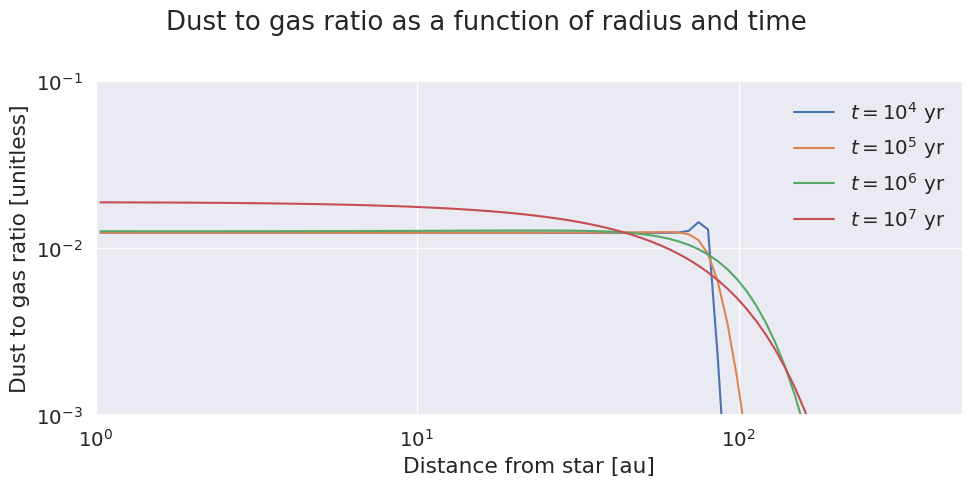

In [ ]:
fig, ax = plt.subplots(figsize = (10, 5))


fig.suptitle('Dust to gas ratio as a function of radius and time')
for i in range(1, len(sim.t.snapshots)+1):
    cstr = "C"+str(i)
    d2gratio = (sigmaDust2[i,:,0] + Sigma_dust[i,:,1]) / Sigma_gas[i]
    ax.loglog(r[i], d2gratio, label=f'$t=10^{np.log10(t[i]):1.0f}$ yr')

ax.set(xlim = (1, 500), ylim = (1e-3, 1e-1), xlabel = 'Distance from star [au]', ylabel = 'Dust to gas ratio [unitless]')
plt.legend(frameon = False)
plt.tight_layout()
plt.savefig('../graphics/d2gratio', dpi = 300)